決定木では層が深くなるほどサンプル数が少なくなるため、過学習を引き起こしてしまう。<br>
適切なところで打ち切る必要がある。

trainデータの取り方によっては全く異なる解になってしまうことがある。
- あるtrainサンプルでは、初回は花弁の長さで分けるべき

- あるtrainサンプルでは、初回は花弁の幅で分けるべき

と判断される場合に領域が全く異なる。

### アンサンブル学習
決定木は単体で用いられることはほとんどない。<br>

#### バギング
複数のブートストラップサンプルに対してその分の学習器を作る。<br>
このとき、やや過学習気味にするのが良い。<br>
決定木におけるバギングを**ランダムフォレスト**と言う。

#### ブースティング
決定木におけるブースティングを**勾配ブースティング木**と言う。<br>
ランダムフォレストより汎化性能が高いことが多い。

課題:
    単体の精度とアンサンブルの精度をクロスバリデーションで比較してみよう。

決定木では一つの特徴量ずつ見ていくのでデータのスケールを合わせる必要がない=標準化いらない<br>
木の上流に近いほど重要な変数であり、**特徴量の重要度を見れる**という使い方も良い。

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()

In [25]:
X_1 = iris.data[:,[2,3]]
y_1 = iris.target

X_1_train,X_1_test,y_1_train,y_1_test=train_test_split(X_1,y_1,test_size=0.3,random_state=0)

In [18]:
# 決定木
from sklearn.tree import DecisionTreeClassifier
tree_1=DecisionTreeClassifier(random_state=0)
tree_1.fit(X_1_train,y_1_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [19]:
# 決定曲線をプロットする関数
def plot_decision_regions(X, y, classifier, resolution=0.02):
    from matplotlib.colors import ListedColormap
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min()-1 , X[:, 0].max() +1
    x2_min, x2_max = X[:, 1].min()-1 , X[:, 1].max() +1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)

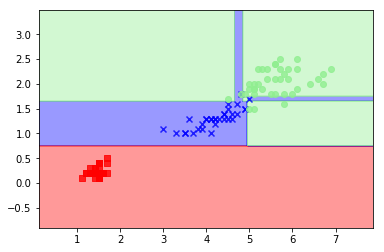

In [20]:
plot_decision_regions(X_1_train,y_1_train,tree_1)

In [22]:
#クロスバリデーションによる汎化性能の評価
# データの分割方法を指定
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=0)

from sklearn.model_selection import cross_val_score
cross_val_score(tree_1,X_1,y_1,cv=kf).mean() #tree_1が学習済みでなくても使える。

0.94666666666666666

In [26]:
# test精度の確認
print('train: {:.3f}'.format(tree_1.score(X_1_train, y_1_train)))
print('test : {:.3f}'.format(tree_1.score(X_1_test, y_1_test)))

train: 0.990
test : 0.956


### 木構造の可視化

In [32]:
# .dotファイルをエクスポート
from sklearn.tree import export_graphviz
export_graphviz(tree_1, out_file='tree_1.dot', feature_names=['petal length', 'petal width'],
               class_names=['setosa', 'versicolour', 'virsinica'], impurity=False, filled=True)

In [33]:
# import cv2
# img=cv2.imread('tree_1.png')
# plt.figure(figsize=(12, 12))
# plt.imshow(img)
# plt.show()

In [34]:
from sklearn.tree import DecisionTreeClassifier
tree_2=DecisionTreeClassifier(random_state=0,max_depth=3)
tree_2.fit(X_1_train,y_1_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

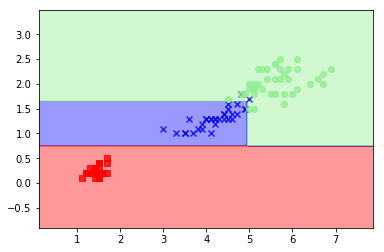

In [35]:
plot_decision_regions(X_1_train,y_1_train,tree_2)

In [37]:
#汎化性能
from sklearn.model_selection import cross_val_score
cross_val_score(tree_2,X_1,y_1,cv=kf).mean()

0.95333333333333337

max_depthを指定した方が汎化性能が上がっていることがわかる。

### ランダムフォレストによる学習

In [48]:
from sklearn.ensemble import RandomForestClassifier
rfc_1=RandomForestClassifier(random_state=0,n_estimators=10)
rfc_1.fit(X_1_train,y_1_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

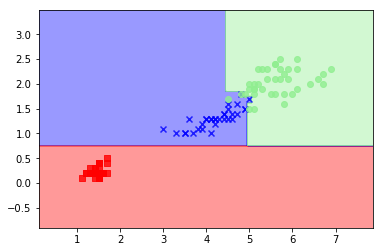

In [49]:
plot_decision_regions(X_1_train,y_1_train,rfc_1)

In [50]:
print('train accuracy: %.3f' % rfc_1.score(X_1_train, y_1_train))
print('test  accuracy: %.3f' % rfc_1.score(X_1_test, y_1_test))

train accuracy: 0.981
test  accuracy: 0.956


In [58]:
#アンサンブルでの汎化性能
from sklearn.model_selection import cross_val_score
cross_val_score(rfc_1,X_1,y_1).mean()

0.95383986928104569

### 特徴量の重要度を見ることにも使える

In [60]:
from sklearn.datasets import load_breast_cancer
bc=load_breast_cancer()

from sklearn.model_selection import train_test_split
X_2_train,X_2_test,y_2_train,y_2_test=train_test_split(bc.data,bc.target,test_size=0.3,random_state=0)

In [53]:
from sklearn.ensemble import RandomForestClassifier
rfc_2 = RandomForestClassifier(random_state=0, n_estimators=100)
rfc_2.fit(X_2_train, y_2_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [55]:
# feature importanceに重要度が格納
importance=rfc_2.feature_importances_
importance

array([ 0.02163832,  0.0160603 ,  0.06024742,  0.03822632,  0.00537896,
        0.00670286,  0.08697012,  0.13127439,  0.00437402,  0.00268874,
        0.02795751,  0.00600722,  0.01623726,  0.02693081,  0.00255   ,
        0.00322232,  0.00519352,  0.00334574,  0.00662461,  0.00432006,
        0.09124751,  0.01303042,  0.15081306,  0.05391841,  0.01113124,
        0.01651618,  0.03479047,  0.1345056 ,  0.00772685,  0.01036977])

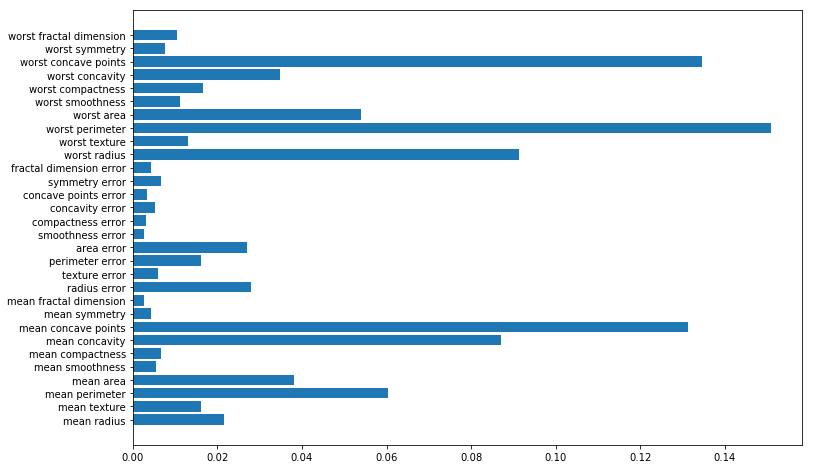

In [57]:
n_features = len(bc.feature_names)
plt.figure(figsize=(12, 8))
plt.barh(range(n_features), rfc_2.feature_importances_ , align='center')
plt.yticks(np.arange(n_features), bc.feature_names) #yticksで変数名を表示できる
plt.show()

In [61]:
# ランダムフォレストは予測確率を出力できる
# testデータの０番目の人が癌かどうか予測
rfc_2.predict_proba(X_2_test[0].reshape(1, -1))

array([[ 0.97,  0.03]])

### 勾配ブースティング

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
gbct=GradientBoostingClassifier(random_state=0, max_depth=3, learning_rate=0.05)
gbct.fit(X_2_train,y_2_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=0,
              subsample=1.0, verbose=0, warm_start=False)

In [73]:
# 正答率を出力
print('train accuracy: %.3f' % gbct.score(X_2_train, y_2_train))
print('test  accuracy: %.3f' % gbct.score(X_2_test, y_2_test))

train accuracy: 1.000
test  accuracy: 0.965


In [74]:
# 勾配ブーストによる汎化性能
from sklearn.model_selection import cross_val_score
cross_val_score(gbct,X_2_train,y_2_train).mean()

0.94474823422191845

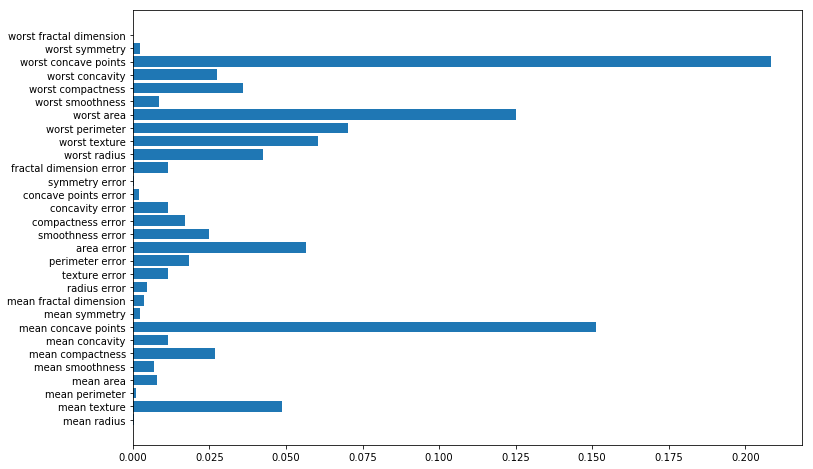

In [75]:
n_features=len(bc.feature_names)
plt.figure(figsize=(12,8))
plt.barh(np.arange(n_features),gbct.feature_importances_,align='center')
plt.yticks(np.arange(n_features),bc.feature_names)
plt.show()

In [76]:
# 予測確率を出力する
gbct.predict_proba(X_2_test[0].reshape(1, -1))

array([[ 0.98497179,  0.01502821]])